In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [56]:
horo_filter = np.array([[-1,0,1],
                        [-2,0,2],
                        [-1,0,1]])
vert_filter = np.array([[-1,-2,-1],
                        [0,0,0],
                        [1,2,1]])
f = np.array([[1,1,1],
                        [1,1,1],
                        [1,1,1]]) * (1/9)

In [49]:
image = cv2.imread("receipt.jpg", cv2.IMREAD_GRAYSCALE)
image = cv2.blur(image, ksize=(5,5))

In [74]:
def plot_image_gray(image):
    fig = plt.figure(figsize=(10,8))
    plt.imshow(image, cmap='gray')
    plt.show()

### Valid Convolution

In [80]:
def iter_image_regions(image, kernel):
    k_w,k_h = kernel.shape[1], kernel.shape[0]
    i_w,i_h = image.shape[1], image.shape[0]
    for i in range(i_h-k_h):
        for j in range(i_w-k_w):
            yield image[i:i+k_h, j:j+k_w], i, j

def convolve(image, kernel):
    imc = image.copy()
    k_w,k_h = kernel.shape[1], kernel.shape[0]
    i_w,i_h = image.shape[1], image.shape[0]
    convolved_image = np.zeros((i_h-k_h+1,i_w-k_w+1))
    for region, i, j in iter_image_regions(imc, kernel):
        convolved_image[i][j] = np.sum(region*kernel)
    return convolved_image

- architecture - compress square images IMAGES -> CONVOLUTION -> RELU -> MAX POOL -> FLATTEN -> LINEAR LAYER -> SOFTMAX

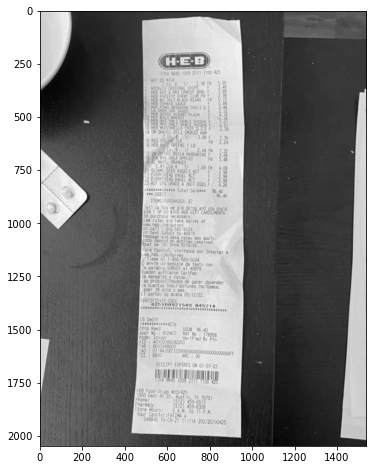

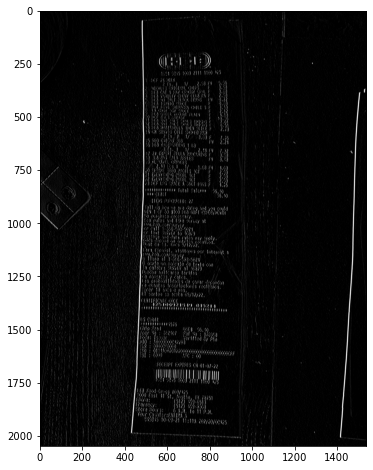

In [54]:
plot_image_gray(image)
plot_image_gray(cv2.filter2D(image, ddepth=-1, kernel=horo_filter))

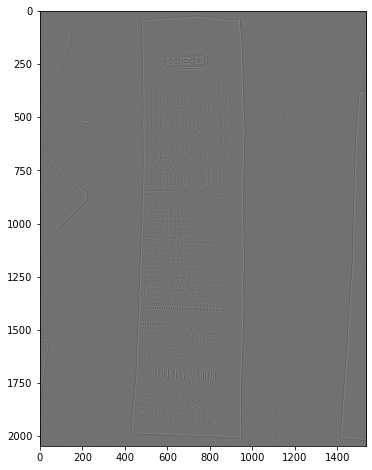

In [81]:
new_image = convolve(image, kernel)
plot_image_gray(new_image)

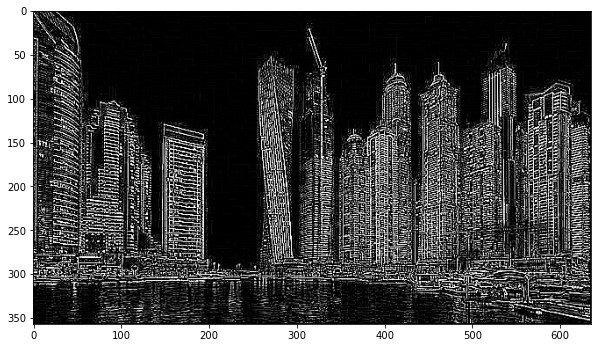

In [83]:
building = cv2.imread("2DConvolved.jpg")
building = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)
plot_image_gray(building)

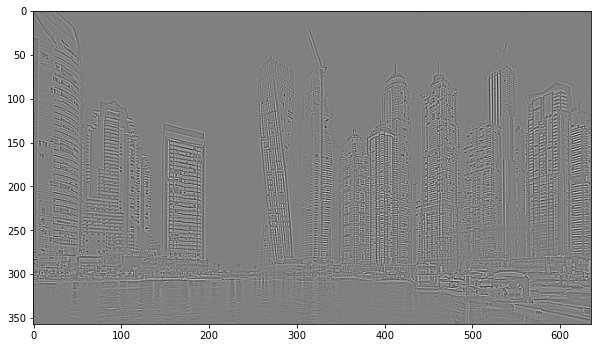

True

In [82]:
building = cv2.imread("building.jpg")
building = cv2.cvtColor(building, cv2.COLOR_BGR2GRAY)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
output = convolve(building, kernel)
plot_image_gray(-output)
cv2.imwrite('2DConvolved.jpg', output)

In [69]:
np.min(image)

14

In [1]:
from sklearn.metrics import roc_auc_score

y = [1,0,1,1]
pred = [0.3,0.6,0.8,0.9]

roc_auc_score(y, pred)

0.6666666666666666